In [8]:
%config IPCompleter.greedy=True

# Standard Survivability Statistics

##  Cox's proportional hazard model

In [16]:
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

In [17]:
rossi_dataset=load_rossi()

In [24]:
rossi_dataset

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3
5,52,0,0,24,1,1,0,0,2
6,23,1,0,25,1,1,1,1,0
7,52,0,1,21,1,1,0,1,4
8,52,0,0,22,1,0,0,0,6
9,52,0,0,20,1,1,0,0,0


In [23]:
rossi_dataset.columns[0]

'week'

In [26]:
cph=CoxPHFitter()
cph.fit(rossi_dataset,duration_col='week',event_col='arrest',show_progress=True)
cph.print_summary()

Iteration 1: norm_delta = 0.50881, step_size = 0.9500, ll = -675.38063, newton_decrement = 16.76434, seconds_since_start = 0.1
Iteration 2: norm_delta = 0.13852, step_size = 0.9500, ll = -659.79004, newton_decrement = 0.99157, seconds_since_start = 0.1
Iteration 3: norm_delta = 0.01802, step_size = 0.9500, ll = -658.76197, newton_decrement = 0.01422, seconds_since_start = 0.2
Iteration 4: norm_delta = 0.00108, step_size = 1.0000, ll = -658.74771, newton_decrement = 0.00005, seconds_since_start = 0.2
Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.2
Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 observations, 318 censored>
      duration col = 'week'
         event col = 'arrest'
number of subjects = 432
  number of events = 114
    log-likelihood = -658.75
  time fit was run = 2019-04-08 08:38:03 UTC

---
      coef exp(coef)  se(coef)     z      p  -log2(p)  lower 0.95  upper

In [28]:
cph.hazards_

fin    -0.379422
age    -0.057438
race    0.313900
wexp   -0.149796
mar    -0.433704
paro   -0.084871
prio    0.091497
dtype: float64

In [30]:
cph.baseline_hazard_

,baseline hazard
T,
1.0,0.001958
2.0,0.001964
3.0,0.001965
4.0,0.001969
5.0,0.001975
6.0,0.001984
7.0,0.001995
8.0,0.009990
9.0,0.004053


In [32]:
cph.score_

0.6403292470997135

In [35]:
X=rossi_dataset.drop (["week","arrest"],axis=1)

In [37]:
cph.predict_partial_hazard(X) 
#cph.predict_survival_function(X, times=[5., 25., 50.])
#cph.predict_median(X)

,0
0,1.219126
1,3.230250
2,3.031058
3,0.487712
4,1.214025
5,1.238655
6,0.579853
7,1.110755
8,2.327246
9,1.297946


In [38]:
cph.predict_survival_function(X, times=[5., 25., 50.])

,0,1,2,3,4,5,6,7,8,9,...,422,423,424,425,426,427,428,429,430,431
5.0,0.988085,0.968739,0.970639,0.995216,0.988135,0.987895,0.994315,0.989139,0.977378,0.987320,...,0.989129,0.980101,0.980231,0.988875,0.994450,0.995909,0.985189,0.994319,0.990843,0.993039
25.0,0.875711,0.703521,0.718943,0.948291,0.876198,0.873851,0.938826,0.886104,0.776194,0.868229,...,0.886011,0.800471,0.801649,0.883492,0.940239,0.955622,0.847704,0.938870,0.903159,0.925566
50.0,0.725969,0.428038,0.451031,0.879752,0.726942,0.722254,0.858714,0.746932,0.542625,0.711092,...,0.746745,0.584487,0.586563,0.741632,0.861836,0.896252,0.671203,0.858810,0.782096,0.829740


In [39]:
cph.predict_median(X)

,0.5
0,inf
1,44.000000
2,46.000000
3,inf
4,inf
5,inf
6,inf
7,inf
8,inf
9,inf


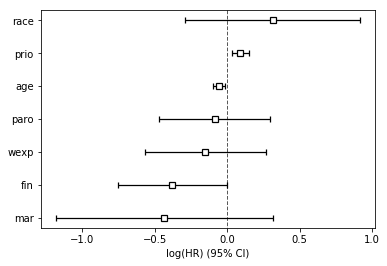

In [46]:
cph.plot()